load the datasets with the recorded scores and plot some stuff.

In [1]:
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv

In [2]:
def getDataframe(name = 'perspective'):
    """ 
    Returns df if given folder exists, None otherwise.
    """
    try:
        scoreDataframe = pd.read_csv("results/" + name + ".csv")
        scoreDataframe = scoreDataframe[["utterance","intentClass","score"]]
        return scoreDataframe
    except:
        return None

In [3]:
modelName = 'detoxify'  #insert 'perspective', 'rewire' or 'detoxify'
scoreDataframe = getDataframe(modelName)

In [70]:
"""
if it doesn't exist yet, create new folder for Model of choice.
Also creates subfolders for plots and sheets
"""
folderName = 'analysis/' + modelName + '/'
if not os.path.exists(folderName):
    os.mkdir(folderName)



In [71]:
selected_rows = scoreDataframe[scoreDataframe['score'] < 0]
percentage = str(100* len(selected_rows)/len(scoreDataframe))[:5]

with open(folderName + 'invalid.txt', 'w') as f:
    f.write(f"The file {modelName}  contains {len(scoreDataframe)} scores.\n")
    f.write(f"Of these, {len(selected_rows)} ({percentage}%) are classified as unreadable (not in English).")

In [6]:
scores = scoreDataframe[scoreDataframe['score'] >= 0]
print(len(scores))

8973


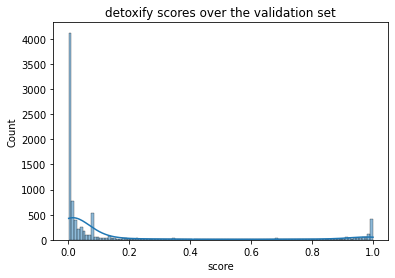

In [73]:
sns.histplot(x=scores["score"],kde=True).set(title= modelName + " scores over the validation set")
plt.savefig(folderName + "hist.png")

In [7]:
#Get the values for a given class.
def getClassValues(scores, desiredClass = 'E'):
    acceptableValues = ['E','I','O','A']
    if desiredClass not in acceptableValues:
        print("Error: The class you selected doesn't exist.")
        return scores
    val = scores[scores['intentClass'] == desiredClass]
    return val

In [8]:
# ugly code
implicit = getClassValues(scores,'I')
explicit = getClassValues(scores,'E')
action = getClassValues(scores,'A')
other = getClassValues(scores,'O')
toxic = scores[(scores['intentClass'] == 'E') | (scores['intentClass'] == 'I')]
nonToxic = scores[(scores['intentClass'] == 'O') | (scores['intentClass'] == 'A')]

In [13]:
print(implicit[implicit['score'] < 0.1])

        utterance intentClass     score
20             Ez           I  0.007343
24       wez ez ?           I  0.012996
25       team ezz           I  0.004497
30      team feed           I  0.000860
45             ez           I  0.007343
...           ...         ...       ...
8885      ez bois           I  0.002987
8907           ez           I  0.007343
8911       ez all           I  0.009547
8946  ez +25 rank           I  0.001067
8951      ez bara           I  0.006831

[447 rows x 3 columns]


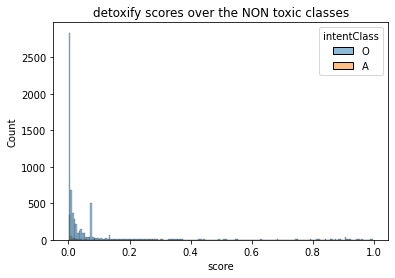

In [76]:
sns.histplot(data=toxic, x="score", hue="intentClass").set(title= modelName + " scores over the toxic classes")
plt.savefig(folderName + "toxicClasses.png")
plt.close()
sns.histplot(data=nonToxic, x="score", hue="intentClass").set(title= modelName + " scores over the NON toxic classes")
plt.savefig(folderName + "nonToxicClasses.png")

In [77]:
def misclassifications(df):
    thresholds = [0.2, 0.5, 0.7, 0.9, 0.95]
    rows = [["Threshold","Percentage", "NumScores below thresholds", "Ratio"]]
    for threshold in thresholds:
        percentage = len(df)
        misclassified = df[df['score'] < threshold]
        ratio = str(100 * len(misclassified) / len(df))[:5] + "%"
        values = [threshold,len(misclassified),ratio, str(len(misclassified)) + "/" + str(len(df))]
        rows.append(values)
    return rows
def saveScores(rows,name):
    if name is None: 
        name = 'generic'
    with open(folderName + name + ".csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(rows)

In [78]:
scores = misclassifications(explicit)
saveScores(scores,'explicit')
scores = misclassifications(implicit)
saveScores(scores,'implicit')
scores = misclassifications(other)
saveScores(scores,'other')
scores = misclassifications(action)
saveScores(scores,'action')

In [ ]:
thresholds = [0.2, 0.5, 0.7, 0.9, 0.95]
for 